# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Experimental-determination-of-waveplate-parameters" data-toc-modified-id="Experimental-determination-of-waveplate-parameters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Experimental determination of waveplate parameters</a></div><div class="lev2 toc-item"><a href="#Load-data" data-toc-modified-id="Load-data-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load data</a></div><div class="lev2 toc-item"><a href="#Fitting-data" data-toc-modified-id="Fitting-data-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fitting data</a></div><div class="lev3 toc-item"><a href="#Polarizers-parallel-beta-=-0º" data-toc-modified-id="Polarizers-parallel-beta-=-0º-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Polarizers parallel $\beta = 0º$</a></div><div class="lev3 toc-item"><a href="#Polarizers-crossed-beta-=-\pi/2" data-toc-modified-id="Polarizers-crossed-beta-=-\pi/2-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Polarizers crossed $\beta = \pi/2$</a></div><div class="lev3 toc-item"><a href="#Polarizers-45-beta-=-\pi/4º" data-toc-modified-id="Polarizers-45-beta-=-\pi/4º-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Polarizers 45 $\beta = \pi/4º$</a></div><div class="lev2 toc-item"><a href="#Final-Parameters" data-toc-modified-id="Final-Parameters-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Final Parameters</a></div>

# Experimental determination of waveplate parameters

Author: Luis Miguel Sanchez Brea

Date:   29/02/2018

Purpose: Ecograb project, polariscope callibration

We have diode laser at 850 nm (current = 314 mA)
We have lens for collimating and Thorlabs DG10-600-B diffuser

We have polarizer 1 Thorlabs LPNIRE100-B

We have polarizer 4 Thorlabs LPNIRE100-B

We have $\lambda/4$ Thorlabs WPQ10E-850-SP at motor 2

Polarizer 1 is placed at 0º, arbitrarily

Polarizer 4 is placed at 70.496º for pass light (aligned to polarizer 1)

We rotate $\lambda/4$ (motor 2 )

We rotate polarizer 4 in order to determine the polarization parameters of WPQ10E-850-SP. We assume that polarizers do not present depolarization and then, Jones Matrix formalism is valid:

Theory is performed in **TODO**

In order to determine parameters of $\lambda/4$ 

After this formalism, we pass to Mueller using Jones-Mueller Transformation 

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import hickle as hkl
import time
import pprint
from __future__ import print_function

degrees = sp.pi/180

/home/luismiguel/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load data

(0, 1.5829796621343122)

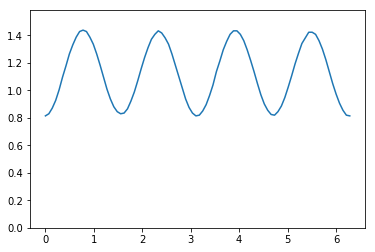

In [3]:
data_par=np.load('I_parallel_180219.npy')
angles_par=data_par[:,0]*degrees
intensities_par=data_par[:,1]

plt.figure()
plt.plot(angles_par, intensities_par)
plt.ylim(0,intensities_par.max()*1.1)

(0, 0.7218144109239802)

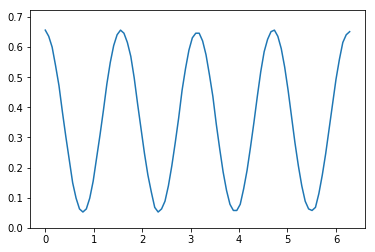

In [4]:
data_per=np.load('I_crossed_180219.npy')
angles_per=data_per[:,0]*degrees
intensities_per=data_per[:,1]

plt.figure()
plt.plot(angles_per, intensities_per)
plt.ylim(0,intensities_per.max()*1.1)

(0, 1.1889824883779512)

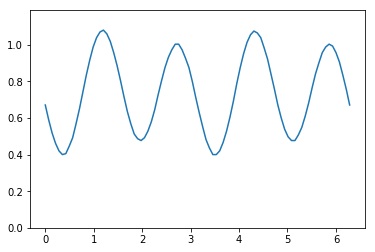

In [5]:
data_45=np.load('I_45_180219.npy')
angles_45=data_45[:,0]*degrees
intensities_45=data_45[:,1]

plt.figure()
plt.plot(angles_45, intensities_45)
plt.ylim(0,intensities_45.max()*1.1)

## Fitting data

We have experimentally determined the intensity for crossed polarizers, parallel polarizers and 45º polarizers. 

We have obtained theoretical equations at Mathematica for linear polarizers with the same angle, with axis crossed and at 45º.

In [7]:
from scipy import optimize
from scipy import cos, sin


### Polarizers parallel $\beta = 0º$

In [8]:
# par: I0, a, delta, theta_0   (b=a)
# Fit the first set
# p0=0.128242248318
# p1=0.946436027636

# p0=0.12
# p1=1


def I_theory_parallel(par, angle):
    I0, a, delta, theta_0, p0,p1 = par
    fi=angle-theta_0
    
    Intensity=I0*a**2/8*((p0**4+p1**4)*(3+cos(4*fi)+2*cos(delta)*(sin(2*fi))**2)
                         -4*p0**3*p1*sin(delta)*sin(2*fi)
                        +8*p0**2*p1**2*(sin(delta/2)*sin(2*fi))**2
                         +4*p0*p1**3*sin(delta)*sin(2*fi))
    return Intensity
    
errfunc_parallel = lambda par, x, y: I_theory_parallel(par, x) - y # Distance to the target function

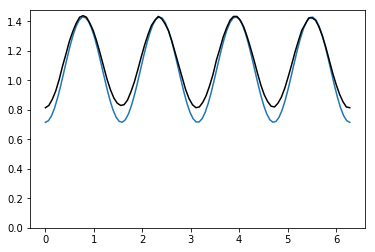

In [9]:
# prueba
num_data=100
plt.figure()
angle=sp.linspace(0,2*sp.pi,num_data)
par_example=[2.92, .99, sp.pi/2, sp.pi/4+sp.pi/2, 0 ,1]
Intensidad_trial=I_theory_parallel(par_example,angle)
plt.plot(angle, Intensidad_trial)
plt.plot(angles_par, intensities_par,'k')
plt.ylim(ymin=0);

In [10]:
par_example=[2.92, .99, sp.pi/2, sp.pi/4+sp.pi/2, 0 ,1]
#positions=theta
#intensities=Intensidad_trial
param_result_parallel, success = optimize.leastsq(errfunc_parallel, par_example[:], 
                                         args=(angles_par, intensities_par))
print(param_result_parallel, success)

y_fitting = I_theory_parallel(param_result_parallel, angles_par)
residuals_par= intensities_par - y_fitting

[ 3.27375239  0.99101374  1.42624874  2.34567798 -0.00374638  0.97139909] 1


Text(0.5,1,u'residuals')

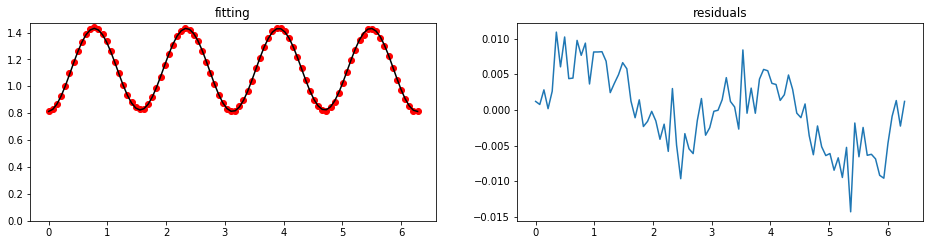

In [362]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(angles_par, intensities_par, "ro")
plt.plot(angles_par,y_fitting , "k") # Plot of the data and the fit
plt.title('fitting')
plt.ylim(ymin=0);

plt.subplot(2,2,2)
plt.plot(angles_par, residuals_par)
plt.title('residuals');

In [363]:
print("{}, {}, {}, {}".format(param_result_parallel[0], param_result_parallel[1], 
                              param_result_parallel[2]/degrees, param_result_parallel[3]/degrees))
print(sp.std(abs(residuals_par)))

3.27375238637, 0.991013737775, 81.7180335279, 134.397448465
0.0030525967886989346


### Polarizers crossed $\beta = \pi/2$


In [364]:
# par: I0, a, delta, theta_0   (b=a)
# Fit the first set

 
def I_theory_perpendicular(par, angle):
    I0, a, delta, theta_0, p0,p1 = par
    fi=angle-theta_0
    
    Intensity=I0*a**2/4*(2*(p0**4+p1**4)*(sin(delta/2)*sin(2*fi))**2
                        +2*sin(delta)*sin(2*fi)*(p0**3*p1-p0*p1**3)
                        +p0**2*p1**2*(3+cos(4*fi)+2*cos(delta)*(sin(2*fi))**2))
    return Intensity
    
errfunc_perpendicular = lambda par, x, y: I_theory_perpendicular(par, x) - y # Distance to the target function

(0, 0.7060326084531143)

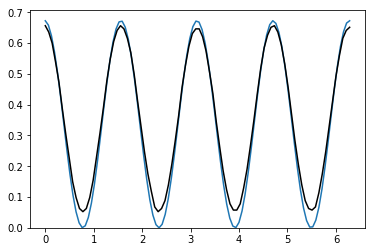

In [365]:
# prueba
num_data=100
plt.figure()
angle=sp.linspace(0,2*sp.pi,num_data)
per_example=[3.30670914, 1.11111564, 1.22275774, 0.77579866+sp.pi/2, 0 ,1]
Intensidad_trial=I_theory_perpendicular(per_example,angle)
plt.plot(angle, Intensidad_trial)
plt.plot(angles_par, intensities_per,'k')
plt.ylim(ymin=0)

In [366]:
par_example=[3.30670914, 1.11111564, 1.22275774, 0.77579866+sp.pi/2,0,1]
#positions=theta
#intensities=Intensidad_trial
param_result_perpendicular, success = optimize.leastsq(errfunc_perpendicular, par_example[:], 
                                         args=(angles_per, intensities_per))
print(param_result_perpendicular, success)

y_fitting_perp = I_theory_perpendicular(param_result_perpendicular, angles_per)
residuals_per= intensities_per - y_fitting_perp

[2.15913013 0.93337166 3.11945491 2.34661165 0.18411698 0.91330897] 1


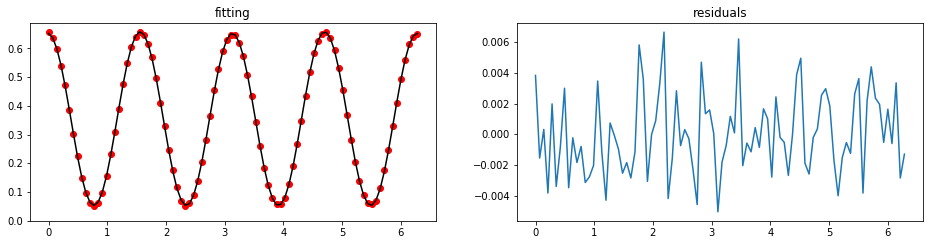

In [367]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(angles_per, intensities_per, "ro")
plt.plot(angles_per,y_fitting_perp , "k") # Plot of the data and the fit
plt.ylim(ymin=0);
plt.title('fitting')

plt.subplot(2,2,2)
plt.plot(angles_par, residuals_per)
plt.title('residuals')
plt.show()

In [368]:
print("{}, {}, {}, {}".format(param_result_perpendicular[0], param_result_perpendicular[1], 
                              param_result_perpendicular[2]/degrees, param_result_perpendicular[3]/degrees))
print(sp.std(abs(residuals_per)))

2.15913012888, 0.933371661608, 178.731600898, 134.45094389
0.0015382538215176285


### Polarizers 45 $\beta = \pi/4º$

In [369]:
# par: I0, a, delta, theta_0   (b=a)
# Fit the first set
 
def I_theory_45(par, angle):
    I0, a, delta, theta_0,p0,p1 = par
    fi=angle-theta_0
    
    Intensity=I0*a**2/4*((p0**2+p1**2)**2
                        + 2*p0*p1*(p0**2-p1**2)*cos(2*fi)*sin(delta)
                        +(p0**2-p1**2)**2*(sin(delta/2))**2*sin(4*fi))
    return Intensity
    
errfunc_45 = lambda par, x, y: I_theory_45(par, x) - y # Distance to the target function

(0, 1.4045921499413867)

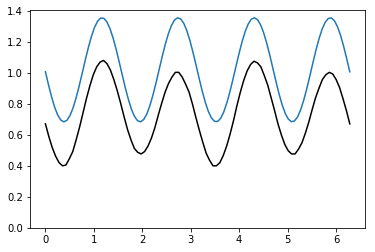

In [370]:
# prueba
num_data=100
plt.figure()
angle=sp.linspace(0,2*sp.pi,num_data)
p45_example=[3.30670914, 1.11111564, 1.22275774, 0.77579866+sp.pi/2,0,1]
Intensidad_trial=I_theory_45(p45_example,angle)
plt.plot(angle, Intensidad_trial)
plt.plot(angles_45, intensities_45,'k')
plt.ylim(ymin=0)

In [371]:
p45_example=[3.64731102, 0.90009881, 1.38299524, 2.34370167,0,1]

param_result_45, success = optimize.leastsq(errfunc_45, p45_example[:], 
                                         args=(angles_45, intensities_45))
print(param_result_45, success)

y_fitting_45 = I_theory_45(param_result_45, angles_45)
residuals_45= intensities_45 - y_fitting_45

[ 3.59216347e+00  9.03708071e-01  1.38299487e+00  2.34364034e+00
 -5.84219680e-04  1.00180969e+00] 1


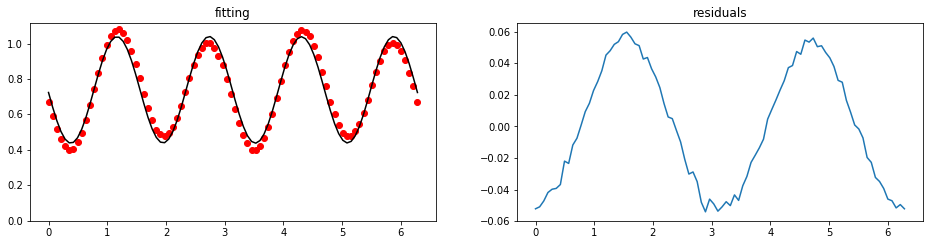

In [372]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(angles_45, intensities_45, "ro")
plt.plot(angles_45,y_fitting_45 , "k") # Plot of the data and the fit
plt.ylim(ymin=0);
plt.title('fitting')

plt.subplot(2,2,2)
plt.plot(angles_45, residuals_45)
plt.title('residuals')
plt.show()

In [380]:
#comparativa

print("{}, {}, {}, {}, {}, {}".format(param_result_parallel[0], param_result_parallel[1], 
                              param_result_parallel[2]/degrees, param_result_parallel[3]/degrees,
                                     param_result_parallel[4],param_result_parallel[5]))
print("{}, {}, {}, {}, {}, {}".format(param_result_perpendicular[0], param_result_perpendicular[1], 
                              (param_result_perpendicular[2]-sp.pi/2)/degrees, 
                                      param_result_perpendicular[3]/degrees,
                                     param_result_perpendicular[4],param_result_perpendicular[5]))

print("{}, {}, {}, {}, {}, {}".format(param_result_45[0], param_result_45[1], 
                              param_result_45[2]/degrees, param_result_45[3]/degrees,
                                     param_result_45[4],param_result_45[5]))
print(sp.std(abs(residuals_par)))
print(sp.std(abs(residuals_per)))
print(sp.std(abs(residuals_45)))

3.27375238637, 0.991013737775, 81.7180335279, 134.397448465, -0.00374638483452, 0.971399092432
2.15913012888, 0.933371661608, 88.7316008978, 134.45094389, 0.18411698434, 0.913308970045
3.59216346526, 0.90370807089, 79.2397690826, 134.280700306, -0.000584219680354, 1.00180969398
0.0030525967886989346
0.0015382538215176285
0.016873811475866918


## Final Parameters

In [384]:
param_average=(param_result_parallel+param_result_perpendicular+param_result_45)/3
print(param_average)

[3.00834866 0.94269782 1.97623284 2.34530999 0.05992879 0.96217259]


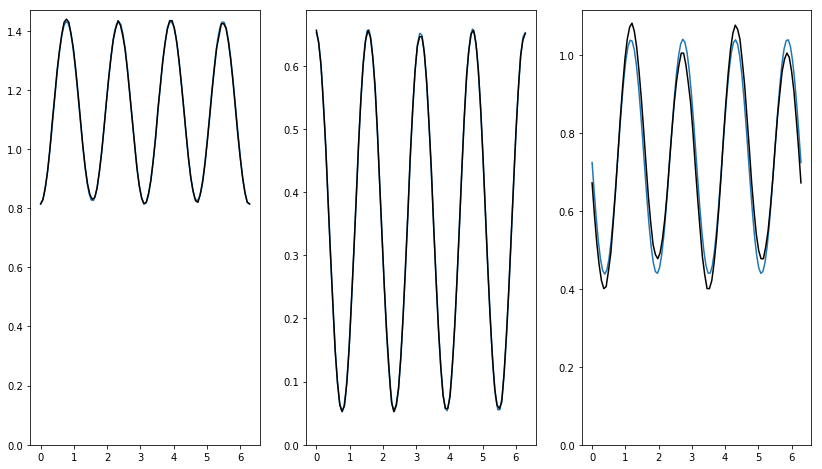

In [391]:
# Cada uno con sus parámetros
num_data=100
plt.figure(figsize=(14,8))

plt.subplot(131)
angle=sp.linspace(0,2*sp.pi,num_data)
Intensidad_trial=I_theory_parallel(param_result_parallel,angle)
plt.plot(angle, Intensidad_trial)
plt.plot(angles_par, intensities_par,'k')
plt.ylim(ymin=0);

plt.subplot(132)
angle=sp.linspace(0,2*sp.pi,num_data)
Intensidad_trial=I_theory_perpendicular(param_result_perpendicular,angle)
plt.plot(angle, Intensidad_trial)
plt.plot(angles_par, intensities_per,'k')
plt.ylim(ymin=0);

plt.subplot(133)
angle=sp.linspace(0,2*sp.pi,num_data)
Intensidad_trial=I_theory_45(param_result_45,angle)
plt.plot(angle, Intensidad_trial)
plt.plot(angles_45, intensities_45,'k')
plt.ylim(ymin=0);

<IPython.core.display.Javascript object>


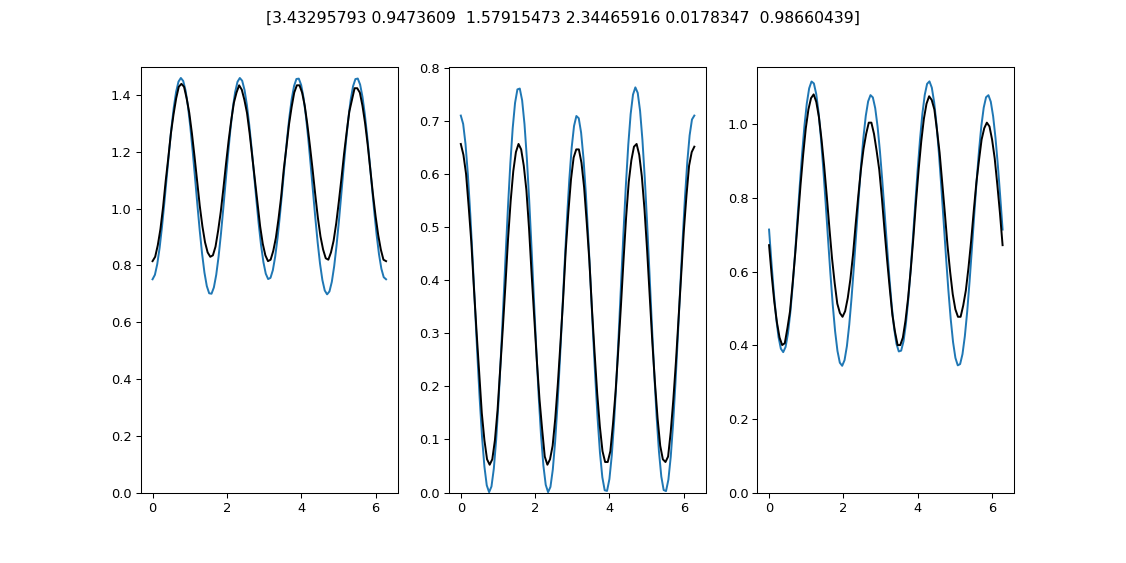

In [505]:
# Parametros finales
param_final=[3.00834866, 0.94269782, 1.97623284, 2.34530999, 0.05992879, 0.96217259]
param_final=param_result_parallel
param_final=param_result_perpendicular
param_final=param_result_45
param_final=[3.00834866, 1, 89.9*degrees, 134.397448465*degrees, 0.129/8, (0.946+3)/4]

param_final=(param_result_parallel+param_result_45+0.125*param_result_perpendicular)/2.125

#3.27375238637, 0.991013737775, 81.7180335279, 134.397448465, -0.00374638483452, 0.971399092432
#2.15913012888, 0.933371661608, 88.7316008978, 134.45094389, 0.18411698434, 0.913308970045
#3.59216346526, 0.90370807089, 79.2397690826, 134.280700306, -0.000584219680354, 1.00180969398
#3.00834866     0.94269782    1.97623284      2.34530999     0.05992879        0.96217259]
param_final=[3.35802688, 0.94653801, 86.25*degrees, (2.34477401-sp.pi/2), 0.04879248, 0.9822929]
param_final=(param_result_parallel+param_result_45)/2
param_final=param_final+[0,0,10*degrees,-0,0.02,0]

num_data=100
plt.figure(figsize=(12,6))

plt.subplot(131)
angle=sp.linspace(0,2*sp.pi,num_data)
Intensidad_trial=I_theory_parallel(param_final,angle)
plt.plot(angle, Intensidad_trial)
plt.plot(angles_par, intensities_par,'k')
plt.ylim(ymin=0);

plt.subplot(132)
angle=sp.linspace(0,2*sp.pi,num_data)
Intensidad_trial=I_theory_perpendicular(param_final,angle)
plt.plot(angle, Intensidad_trial)
plt.plot(angles_par, intensities_per,'k')
plt.ylim(ymin=0);

plt.subplot(133)
angle=sp.linspace(0,2*sp.pi,num_data)
Intensidad_trial=I_theory_45(param_final,angle)
plt.plot(angle, Intensidad_trial)
plt.plot(angles_45, intensities_45,'k')
plt.ylim(ymin=0)
plt.suptitle(param_final)
plt.show()

In [506]:
param_final

array([3.43295793, 0.9473609 , 1.57915473, 2.34465916, 0.0178347 ,
       0.98660439])

In [507]:
1.57915473/degrees

90.47890122712104